<a href="https://colab.research.google.com/github/siddharthabhuyan86/geowebapp/blob/main/qcworkswhop_tq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Hands-on Introduction to Quantum Kernel Methods:TorchQuantum
###1. TorchQuantum Basics

*  Single-qubit gates
*  Superposition
*  Measurement
* Two-qubit gates and entanglement state


###**Set up**

In [ ]:
print('Installing torchquantum...')
!git clone https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable .

Installing torchquantum...
fatal: destination path 'torchquantum' already exists and is not an empty directory.
/content/torchquantum
Obtaining file:///content/torchquantum
  Preparing metadata (setup.py) ... done
  Attempting uninstall: torchquantum
    Found existing installation: torchquantum 0.2.0
    Uninstalling torchquantum-0.2.0:
      Successfully uninstalled torchquantum-0.2.0
  Running setup.py develop for torchquantum


In [ ]:
import torchquantum as tq
import torchquantum.functional as tqf
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy

In [ ]:
# Qubit
n_qubits=1
q_device=tq.QuantumDevice(n_wires=n_qubits)
print(q_device)

 class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j]], dtype=complex64)


In [ ]:
states=q_device.get_states_1d()[0]
print(states)

tensor([1.+0.j, 0.+0.j])


Basis states for 1 qubit system: |0⟩, |1⟩

In [ ]:
print(f"\nInitial quantum state in |0⟩:")
print(f"  |0⟩: {states[0]}")
print(f"  |1⟩: {states[1]}")
print(f"All amplitude is in |0⟩ state!")


Initial quantum state in |0⟩:
  |0⟩: (1+0j)
  |1⟩: 0j
All amplitude is in |0⟩ state!


###X gate
The X gate is a π rotation around the x axis of the Bloch sphere. Applying the X gate to ∣0⟩ results in ∣1⟩ and applying the X gate to ∣1⟩ results in ∣0⟩
 so it is an operation similar to the classical NOT gate, and is also known as bit flip. The matrix representation of the X gate is below.

 [Bloch sphere](https://javafxpert.github.io/grok-bloch/)

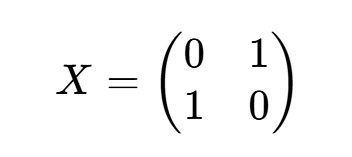





In [ ]:
# X gate
q_device.reset_states(bsz=1)
tqf.x(q_device, wires=0)
states=q_device.get_states_1d()[0]
print(f"after x gate: {states}")

after x gate: tensor([0.+0.j, 1.+0.j])


###H gate
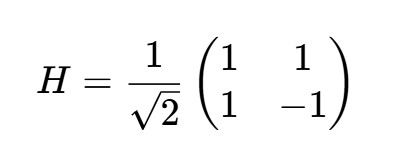

In [ ]:
#Hadamard gate
q_device.reset_states(bsz=1)
tqf.h(q_device, wires=0)
states=q_device.get_states_1d()[0]
print(f"after h gate: {states}")


after h gate: tensor([0.7071+0.j, 0.7071+0.j])


###what the final state should be for the circuits below
1. XX|0>
2. HZH|1>

where

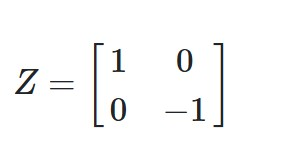




In [ ]:
q_device.reset_states(bsz=1)
tqf.x(q_device, wires=0)
tqf.h(q_device, wires=0)
tqf.z(q_device, wires=0)
tqf.h(q_device, wires=0)
states=q_device.get_states_1d()[0]
print(f"after hzh gate: {states}")

after hzh gate: tensor([1.0000+0.j, 0.0000+0.j])


###Measurement
Measurement is theoretically a very complicated topic. But in practical terms,  forces the qubit’s state α∣0⟩+β∣1⟩ either to ∣0⟩ or ∣1⟩ and we observe the outcome as the probability when we measure.

after h gate: tensor([0.7071+0.j, 0.7071+0.j])


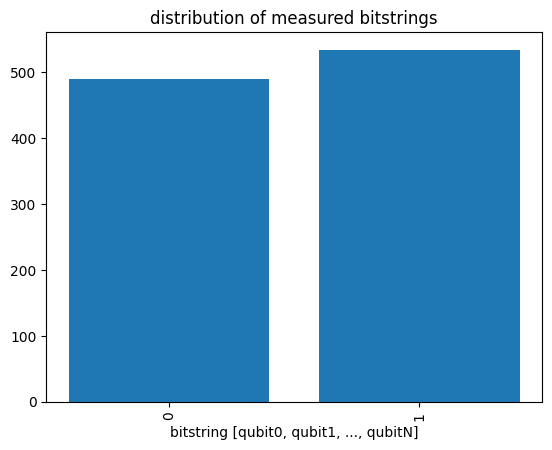

[OrderedDict({'0': 490, '1': 534})]


In [ ]:
#Hadamard gate
q_device.reset_states(bsz=1)
tqf.h(q_device, wires=0)
states=q_device.get_states_1d()[0]
print(f"after h gate: {states}")

bitstring = tq.measure(q_device, n_shots=1024,draw_id=0)
print(bitstring)

### Multi-qubit quantum gate and entanglement

Multi-qubit quantum circuit

We can create a two-qubit quantum circuit with following code. We will apply an H gate to each qubit.




In [ ]:
n_qubits=2
q_device=tq.QuantumDevice(n_wires=n_qubits)
print(q_device)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)


In [ ]:
q_device.reset_states(bsz=1)
tqf.h(q_device, wires=0)
tqf.h(q_device, wires=1)

states=q_device.get_states_1d()[0]
print(f"after h gate: {states}")

after h gate: tensor([0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j])


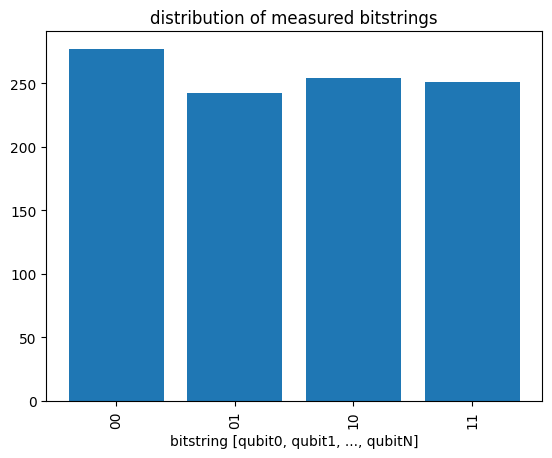

[OrderedDict({'00': 277, '01': 242, '10': 254, '11': 251})]


In [ ]:
bitstring = tq.measure(q_device, n_shots=1024, draw_id=0)
print(bitstring)

### CNOT gate

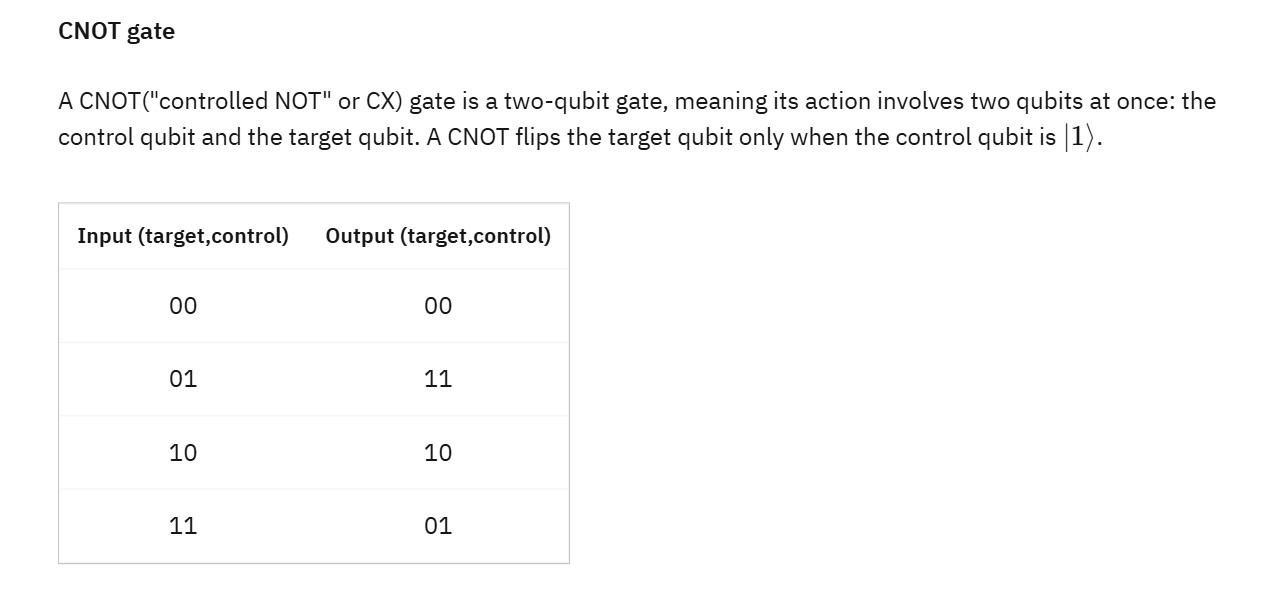

### Entangled state
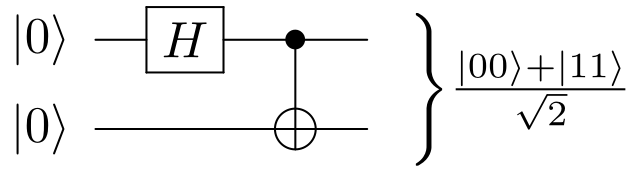

Initial quantum state: tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])
Final quantum state: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])


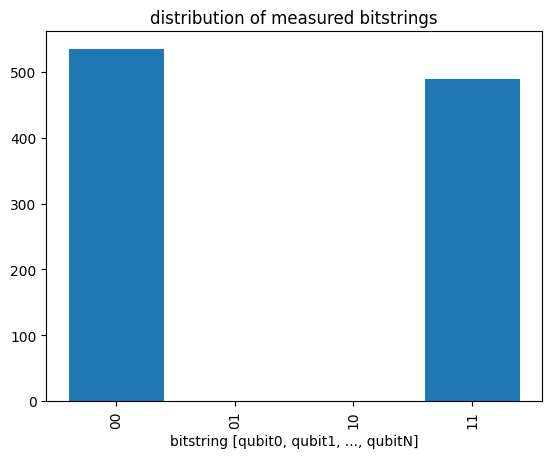

[OrderedDict({'00': 535, '01': 0, '10': 0, '11': 489})]


In [ ]:
q_device = tq.QuantumDevice(n_wires=2)
q_device.reset_states(bsz=1)
print("Initial quantum state:", q_device.get_states_1d()[0])
tqf.h(q_device,wires=0)
tqf.cnot(q_device,wires=[0, 1])
states = q_device.get_states_1d()[0]
print("Final quantum state:", states)

#Measurement
bitstring = tq.measure(q_device, n_shots=1024, draw_id=0)
print(bitstring)

### Data encoding (Angle encoding)

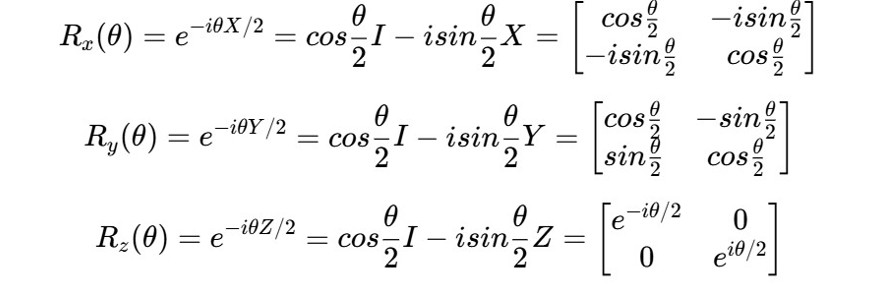

In [ ]:
# RY gate
q_device.reset_states(bsz=1)
tqf.ry(q_device, wires=0, params=[np.pi/2])
states=q_device.get_states_1d()[0]
print(f"after ry gate: {states}")

after ry gate: tensor([0.7071+0.j, 0.0000+0.j, 0.7071+0.j, 0.0000+0.j])


In [ ]:
# Simulate encoding a data point
data_point = np.array([0,np.pi/4,np.pi/2])
print(f"Goal: Encode classical data point x = {data_point} into quantum state")

Goal: Encode classical data point x = [0.         0.78539816 1.57079633] into quantum state


In [ ]:
q_device = tq.QuantumDevice(n_wires=3)
q_device.reset_states(bsz=1)
print("Initial quantum state:", q_device.get_states_1d()[0])
# Angle encoding: map data to RY rotations

for i in range(len(data_point)):
    tqf.ry(q_device, wires=i, params=[data_point[i]])
states = q_device.get_states_1d()[0]
print("Encoded quantum state:", states)

Initial quantum state: tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])
Encoded quantum state: tensor([0.6533+0.j, 0.6533+0.j, 0.2706+0.j, 0.2706+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j,
        0.0000+0.j])


In [ ]:
probs = torch.abs(states)**2
print(probs)

tensor([0.4268, 0.4268, 0.0732, 0.0732, 0.0000, 0.0000, 0.0000, 0.0000])


# 2. Quantum Kernel Methods for moons dataset classification

###Outline
1. Introduction to Quantum Kernel Methods.
2. Build and train an SVM using Quantum Kernel Methods.




###Kernel Methods
Kernels or kernel methods (also called Kernel functions) are sets of different types of algorithms that are being used for pattern analysis. They are used to solve a non-linear problem by a linear classifier. Kernels Methods are employed in SVM (Support Vector Machines) which are often used in classification and regression problems. The SVM uses what is called a “Kernel Trick” where the data is transformed and an optimal boundary is found for the possible outputs.


####Quantum Kernel
Quantum circuit can transfer the data to a high dimension Hilbert space which is hard to simulate on classical computer

###How to evaluate the distance in Hilbert space?
Assume S(x) is the unitary that transfer data x to the state in Hilbert space. To evaluate the inner product between S(x) and S(y), we add a Transpose Conjugation of S(y) behind S(x) and measure the probability that the state falls on $|00\cdots0\rangle$

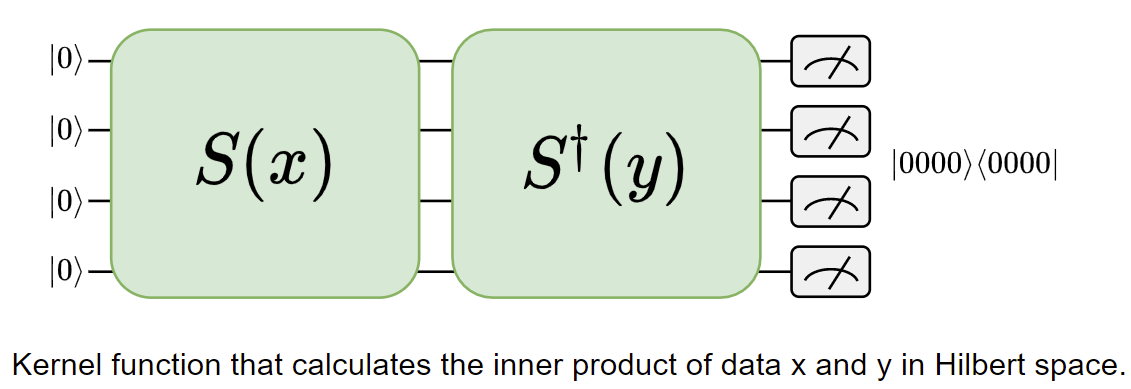

In [ ]:
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(func_name_dict.keys())
print(func_name_dict['ry'])
print(tq.op_name_dict['ry'].num_params)

dict_keys(['hadamard', 'h', 'sh', 'paulix', 'pauliy', 'pauliz', 'i', 's', 't', 'sx', 'cnot', 'cz', 'cy', 'rx', 'ry', 'rz', 'rxx', 'xx', 'ryy', 'yy', 'rzz', 'zz', 'rzx', 'zx', 'swap', 'sswap', 'cswap', 'toffoli', 'phaseshift', 'p', 'cp', 'rot', 'multirz', 'crx', 'cry', 'crz', 'crot', 'u1', 'u2', 'u3', 'u', 'cu1', 'cphase', 'cr', 'cu2', 'cu3', 'cu', 'qubitunitary', 'qubitunitaryfast', 'qubitunitarystrict', 'multicnot', 'multixcnot', 'x', 'y', 'z', 'cx', 'ccnot', 'ccx', 'reset', 'singleexcitation', 'ecr', 'echoedcrossresonance', 'qft', 'sdg', 'tdg', 'sxdg', 'ch', 'ccz', 'iswap', 'cs', 'csdg', 'csx', 'chadamard', 'dcx', 'xxminyy', 'xxplusyy', 'c3x', 'r', 'globalphase', 'c3sx', 'rccx', 'rc3x', 'c4x'])
<function ry at 0x7eeaa973f4c0>
1


Training samples: 140
 Test samples: 60
tensor([[ 0.6202, -0.2280],
        [ 0.1671, -0.4434],
        [ 0.9322,  0.5119],
        [ 0.4536,  0.7098],
        [ 0.4714, -1.1108],
        [-0.0056,  0.4912],
        [-0.2810,  0.5504],
        [-0.9407,  0.2458],
        [-0.1671, -0.3250],
        [ 0.3796, -0.0163],
        [-0.9097,  0.4500],
        [-0.6051, -0.0340],
        [-1.0133, -0.2963],
        [ 0.5059,  0.2348],
        [ 0.9106, -0.0631],
        [-0.6817,  0.8258],
        [-0.4460,  0.3019],
        [ 0.5974, -0.4930],
        [-1.1583,  0.3767],
        [ 0.9036, -0.4611],
        [ 0.1200,  1.1816],
        [-0.7934, -0.1142],
        [ 0.9470, -0.5192],
        [-0.6605,  0.7542],
        [ 0.1069,  0.6310],
        [ 0.0548, -0.2805],
        [ 0.4908, -0.2608],
        [ 0.4170, -0.4799],
        [ 0.1142,  1.0897],
        [ 0.9998, -0.3814],
        [-0.9501,  0.2725],
        [ 0.2818, -0.7858],
        [-0.3042, -0.9564],
        [ 0.1428,  0.2345],
        

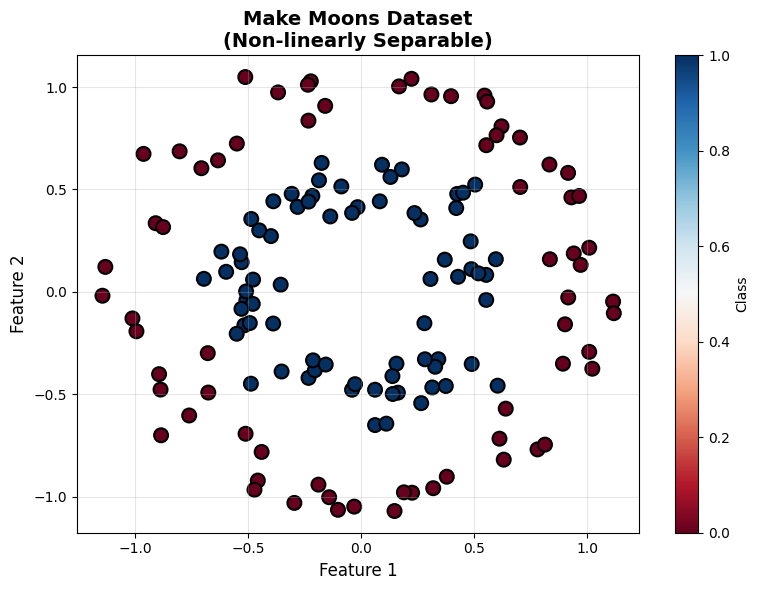

In [ ]:
X, y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 2*np.pi))
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f" Test samples: {len(X_test)}")
print(X_test)
print(y_test)
# Visualize the dataset
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                     cmap='RdBu', s=100, edgecolors='black', linewidth=1.5)
plt.colorbar(scatter, label='Class')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Make Moons Dataset\n(Non-linearly Separable)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print(tq.QuantumModule)

<class 'torchquantum.module.modules.QuantumModule'>


In [ ]:
class KernelAnsatz(tq.QuantumModule):
    def __init__(self):
        super().__init__()
    def forward(self, q_device: tq.QuantumDevice, x, y):
        q_device.reset_states(bsz=x.shape[0])

        # Step 2: Encode x
        tqf.ry(q_device, wires=0, params=x[:, 0])
        tqf.ry(q_device, wires=1, params=x[:, 1])


        # Step 3: Apply inverse encoding of y
        tqf.ry(q_device, wires=1, params=-y[:, 1])
        tqf.ry(q_device, wires=0, params=-y[:, 0])

In [ ]:

class Kernel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.ansatz = KernelAnsatz()

    def forward(self, x, y):
        # Ensure batch format
        x = x.reshape(1, -1)
        y = y.reshape(1, -1)

        # Apply quantum circuit
        self.ansatz(self.q_device, x, y)

        kernel_value = torch.abs(
            self.q_device.get_states_1d()[0, 0]
        )
        return kernel_value

###Train the svm model from sklearn based on our quantum kernel.

Define a kernel matrix function.

Pass the kernel matrix function to SVC, call `.fit(X_train, y_train)` and the SVC object can start training.

Predict and see the accuracy.

In [ ]:
kernel_function = Kernel()
def kernel_matrix(A, B):
    return np.array([[kernel_function(a, b) for b in B] for a in A])

svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(predictions, y_test))

0.6666666666666666


In [ ]:
K_train = kernel_matrix(X_train, X_train)

print("K_train shape:", K_train.shape)
print("Diagonal mean:", np.mean(np.diag(K_train)))
print("Kernel value range:", K_train.min(), K_train.max())


K_train shape: (140, 140)
Diagonal mean: 1.0
Kernel value range: 0.42534962 1.0000001


Text(33.22222222222222, 0.5, 'Sample index')

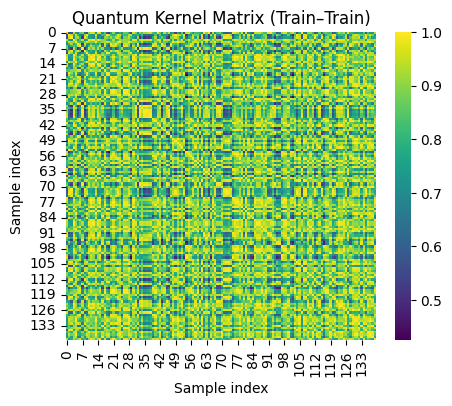

In [ ]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(K_train, cmap="viridis")
plt.title("Quantum Kernel Matrix (Train–Train)")
plt.xlabel("Sample index")
plt.ylabel("Sample index")